In [21]:
pip install -q pytorchvideo transformers evaluate

Note: you may need to restart the kernel to use updated packages.


In [1]:
from huggingface_hub import hf_hub_download

hf_dataset_identifier = "sayakpaul/ucf101-subset"
filename = "UCF101_subset.tar.gz"
file_path = hf_hub_download(repo_id=hf_dataset_identifier, filename=filename, repo_type="dataset")

C:\Users\meran\anaconda3\envs\computervision\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\meran\anaconda3\envs\computervision\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\meran\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mod

In [1]:
from huggingface_hub import interpreter_login
interpreter_login()


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token can be pasted using 'Right-Click'.
Token: ········
Add token as git credential? (Y/n) y
Token is valid (perm

In [ ]:
import tarfile

with tarfile.open(file_path) as t:
     t.extractall(".")

In [2]:
import os

def get_file_paths(directory):
    file_paths = []  # this list will store all of the full filepaths.

    # Walk the tree.
    for directory_path, directory_names, file_names in os.walk(directory):
        for filename in file_names:
            # Join the two strings to form the full filepath.
            filepath = os.path.join(directory_path, filename)
            file_paths.append(filepath)  # Add it to the list.

    return file_paths  # Self-explanatory.

In [3]:
all_video_file_paths = get_file_paths('UCF101_subset')
all_video_file_paths

['UCF101_subset\\test\\ApplyEyeMakeup\\v_ApplyEyeMakeup_g03_c01.avi',
 'UCF101_subset\\test\\ApplyEyeMakeup\\v_ApplyEyeMakeup_g03_c03.avi',
 'UCF101_subset\\test\\ApplyEyeMakeup\\v_ApplyEyeMakeup_g03_c05.avi',
 'UCF101_subset\\test\\ApplyEyeMakeup\\v_ApplyEyeMakeup_g23_c02.avi',
 'UCF101_subset\\test\\ApplyEyeMakeup\\v_ApplyEyeMakeup_g23_c04.avi',
 'UCF101_subset\\test\\ApplyEyeMakeup\\v_ApplyEyeMakeup_g23_c06.avi',
 'UCF101_subset\\test\\ApplyLipstick\\v_ApplyLipstick_g14_c01.avi',
 'UCF101_subset\\test\\ApplyLipstick\\v_ApplyLipstick_g14_c03.avi',
 'UCF101_subset\\test\\ApplyLipstick\\v_ApplyLipstick_g16_c02.avi',
 'UCF101_subset\\test\\ApplyLipstick\\v_ApplyLipstick_g16_c04.avi',
 'UCF101_subset\\test\\Archery\\v_Archery_g16_c01.avi',
 'UCF101_subset\\test\\Archery\\v_Archery_g16_c03.avi',
 'UCF101_subset\\test\\Archery\\v_Archery_g16_c05.avi',
 'UCF101_subset\\test\\Archery\\v_Archery_g17_c02.avi',
 'UCF101_subset\\test\\Archery\\v_Archery_g17_c04.avi',
 'UCF101_subset\\test\\Arche

In [4]:
class_labels = sorted({str(path).split("\\")[2] for path in all_video_file_paths})
label2id = {label: i for i, label in enumerate(class_labels)}
id2label = {i: label for label, i in label2id.items()}

print(f"Unique classes: {list(label2id.keys())}.")

Unique classes: ['ApplyEyeMakeup', 'ApplyLipstick', 'Archery', 'BabyCrawling', 'BalanceBeam', 'BandMarching', 'BaseballPitch', 'Basketball', 'BasketballDunk', 'BenchPress'].


In [5]:
from transformers import VideoMAEImageProcessor, VideoMAEForVideoClassification

model_ckpt = "MCG-NJU/videomae-base"
image_processor = VideoMAEImageProcessor.from_pretrained(model_ckpt)
model = VideoMAEForVideoClassification.from_pretrained(
    model_ckpt,
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes=True, 
)

Some weights of the model checkpoint at MCG-NJU/videomae-base were not used when initializing VideoMAEForVideoClassification: ['decoder.decoder_layers.2.output.dense.weight', 'decoder.decoder_layers.2.intermediate.dense.bias', 'decoder.decoder_layers.0.intermediate.dense.weight', 'encoder_to_decoder.weight', 'decoder.decoder_layers.0.attention.attention.query.weight', 'decoder.decoder_layers.2.layernorm_after.weight', 'decoder.decoder_layers.1.attention.output.dense.weight', 'decoder.decoder_layers.0.intermediate.dense.bias', 'decoder.head.weight', 'decoder.decoder_layers.2.output.dense.bias', 'decoder.decoder_layers.0.output.dense.bias', 'decoder.decoder_layers.0.output.dense.weight', 'decoder.head.bias', 'decoder.decoder_layers.3.attention.attention.value.weight', 'decoder.decoder_layers.2.attention.attention.key.weight', 'decoder.decoder_layers.2.intermediate.dense.weight', 'decoder.decoder_layers.3.layernorm_before.weight', 'decoder.norm.bias', 'decoder.decoder_layers.0.attention.a

In [6]:
import pytorchvideo.data

from pytorchvideo.transforms import (
    ApplyTransformToKey,
    Normalize,
    RandomShortSideScale,
    RemoveKey,
    ShortSideScale,
    UniformTemporalSubsample,
)

from torchvision.transforms import (
    Compose,
    Lambda,
    RandomCrop,
    RandomHorizontalFlip,
    Resize,
)

C:\Users\meran\anaconda3\envs\computervision\Lib\site-packages\torchvision\transforms\functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(


In [7]:
mean = image_processor.image_mean
std = image_processor.image_std
if "shortest_edge" in image_processor.size:
    height = width = image_processor.size["shortest_edge"]
else:
    height = image_processor.size["height"]
    width = image_processor.size["width"]
resize_to = (height, width)

num_frames_to_sample = model.config.num_frames
sample_rate = 4
fps = 30
clip_duration = num_frames_to_sample * sample_rate / fps


In [8]:
dataset_root_path = 'UCF101_subset'
train_transform = Compose(
    [
        ApplyTransformToKey(
            key="video",
            transform=Compose(
                [
                    UniformTemporalSubsample(num_frames_to_sample),
                    Lambda(lambda x: x / 255.0),
                    Normalize(mean, std),
                    RandomShortSideScale(min_size=256, max_size=320),
                    RandomCrop(resize_to),
                    RandomHorizontalFlip(p=0.5),
                ]
            ),
        ),
    ]
)

train_dataset = pytorchvideo.data.Ucf101(
    data_path=os.path.join(dataset_root_path, "train"),
    clip_sampler=pytorchvideo.data.make_clip_sampler("random", clip_duration),
    decode_audio=False,
    transform=train_transform,
)

In [9]:
val_transform = Compose(
    [
        ApplyTransformToKey(
            key="video",
            transform=Compose(
                [
                    UniformTemporalSubsample(num_frames_to_sample),
                    Lambda(lambda x: x / 255.0),
                    Normalize(mean, std),
                    Resize(resize_to),
                ]
            ),
        ),
    ]
)

val_dataset = pytorchvideo.data.Ucf101(
    data_path=os.path.join(dataset_root_path, "val"),
    clip_sampler=pytorchvideo.data.make_clip_sampler("uniform", clip_duration),
    decode_audio=False,
    transform=val_transform,
)

test_dataset = pytorchvideo.data.Ucf101(
    data_path=os.path.join(dataset_root_path, "test"),
    clip_sampler=pytorchvideo.data.make_clip_sampler("uniform", clip_duration),
    decode_audio=False,
    transform=val_transform,
)

In [10]:
print(train_dataset.num_videos, val_dataset.num_videos, test_dataset.num_videos)

300 30 75


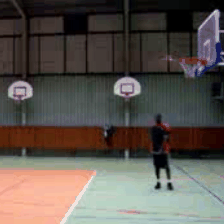

In [11]:
import imageio
import numpy as np
from IPython.display import Image

def unnormalize_img(img):
    """Un-normalizes the image pixels."""
    img = (img * std) + mean
    img = (img * 255).astype("uint8")
    return img.clip(0, 255)

def create_gif(video_tensor, filename="sample.gif"):
    """Prepares a GIF from a video tensor.
    
    The video tensor is expected to have the following shape:
    (num_frames, num_channels, height, width).
    """
    frames = []
    for video_frame in video_tensor:
        frame_unnormalized = unnormalize_img(video_frame.permute(1, 2, 0).numpy())
        frames.append(frame_unnormalized)
    kargs = {"duration": 0.25}
    imageio.mimsave(filename, frames, "GIF", **kargs)
    return filename

def display_gif(video_tensor, gif_name="sample.gif"):
    """Prepares and displays a GIF from a video tensor."""
    video_tensor = video_tensor.permute(1, 0, 2, 3)
    gif_filename = create_gif(video_tensor, gif_name)
    return Image(filename=gif_filename)

sample_video = next(iter(train_dataset))
video_tensor = sample_video["video"]
display_gif(video_tensor)

In [12]:
from transformers import TrainingArguments, Trainer

model_name = model_ckpt.split("/")[-1]
new_model_name = f"{model_name}-finetuned-ucf101-subset"
num_epochs = 4

args = TrainingArguments(
    new_model_name,
    remove_unused_columns=False,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    push_to_hub=True,
    max_steps=(train_dataset.num_videos // 8) * num_epochs,
)

In [13]:
import evaluate

metric = evaluate.load("accuracy")


def compute_metrics(eval_pred):
    predictions = np.argmax(eval_pred.predictions, axis=1)
    return metric.compute(predictions=predictions, references=eval_pred.label_ids)

In [14]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [14]:
def collate_fn(examples):
    # permute to (num_frames, num_channels, height, width)
    pixel_values = torch.stack(
        [example["video"].permute(1, 0, 2, 3) for example in examples]
    )
    labels = torch.tensor([example["label"] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}

In [16]:
trainer = Trainer(
    model,
    args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=image_processor,
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
)

Cloning https://huggingface.co/michaelmerani/videomae-base-finetuned-ucf101-subset into local empty directory.


In [18]:
import torch
import torchvision

train_results = trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
0,2.063400,1.831895,0.271429
1,1.010600,0.983223,0.714286
2,0.506800,0.714206,0.771429
3,0.333100,0.568974,0.857143


C:\Users\meran\anaconda3\envs\computervision\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
C:\Users\meran\anaconda3\envs\computervision\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True

In [29]:
trainer.push_to_hub()

In [21]:
sample_test_video = next(iter(test_dataset))

C:\Users\meran\anaconda3\envs\computervision\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [22]:
def run_inference(model, video):
    # (num_frames, num_channels, height, width)
    perumuted_sample_test_video = video.permute(1, 0, 2, 3)
    inputs = {
        "pixel_values": perumuted_sample_test_video.unsqueeze(0),
        "labels": torch.tensor(
            [sample_test_video["label"]]
        ),  # this can be skipped if you don't have labels available.
    }

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    inputs = {k: v.to(device) for k, v in inputs.items()}
    model = model.to(device)

    # forward pass
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

    return logits


In [ ]:
from transformers import pipeline

video_cls = pipeline(model="michaelmerani/videomae-base-finetuned-ucf101-subset")
video_cls(sample_test_video["video"])

In [ ]:
trained_model = VideoMAEForVideoClassification.from_pretrained("michaelmerani/videomae-base-finetuned-ucf101-subset")
logits = run_inference(trained_model, sample_test_video["video"])